## Week 4A:  More Interactive Data Viz, Working with Raster Data

Sep 27, 2021

## Housekeeping

- [Homework #2](https://github.com/MUSA-550-Fall-2021/assignment-2) due on Wednesday (9/29)
- Choose a dataset to visualize and explore
    - [OpenDataPhilly](https://opendataphilly.org) or one your choosing
    - Email me if you want to analyze one that's not on OpenDataPhilly

## Week #4 Agenda

**Two parts:**

- Part 1: More interactive data visualization: the HoloViz ecosystem
- Part 2: Getting started with raster data

## Part 1: More interactive data viz

## Recap: Data viz in Python

<center>
    <img src=attachment:landscape_hv_nx.png width=700></img>
</center>
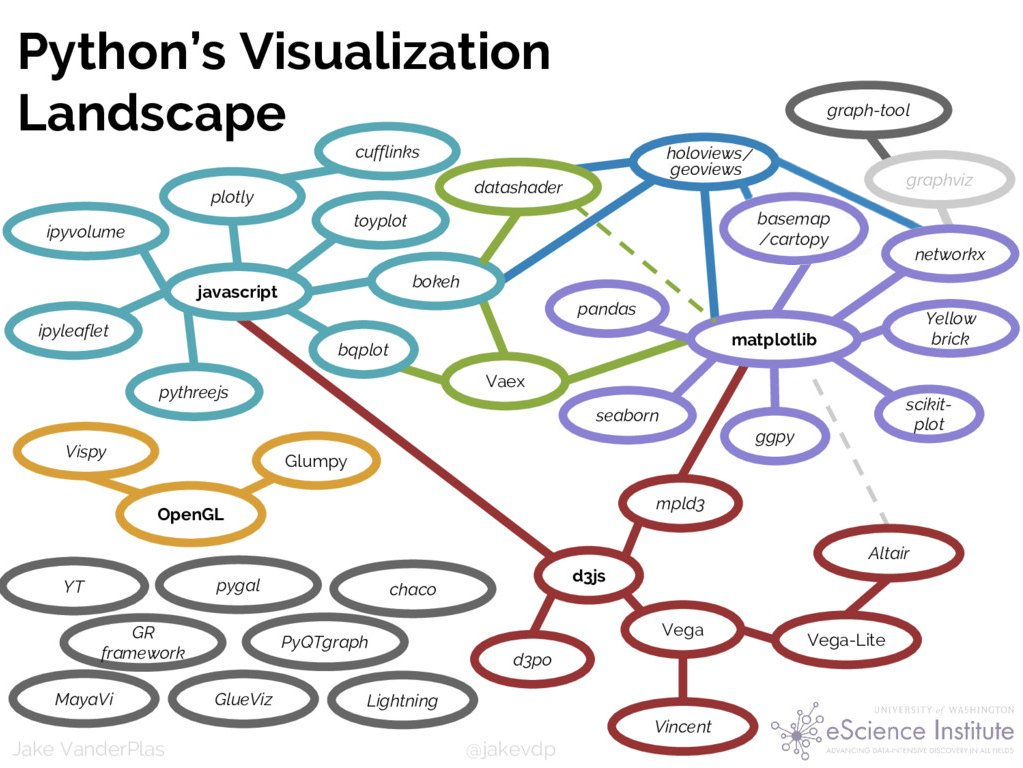

## What have we learned so far

### Matplotlib

- The classic, most flexible library
- Can handle geographic data well
- Overly verbose syntax, syntax is not declarative 

### Pandas

- Quick, built-in interface
- Not as many features as other libraries

### seaborn

- Best for visualizing complex relationships between variables
- Improves matplotlib's syntax: more declarative

### altair

- Easy, declarative syntax
- Lots of interactive features
- Complex visualizations with minimal amounts of code

## We'll learn one more today...

<center>
    <img src=attachment:landscape_hv_nx_pyviz.png width=600></img>
</center>
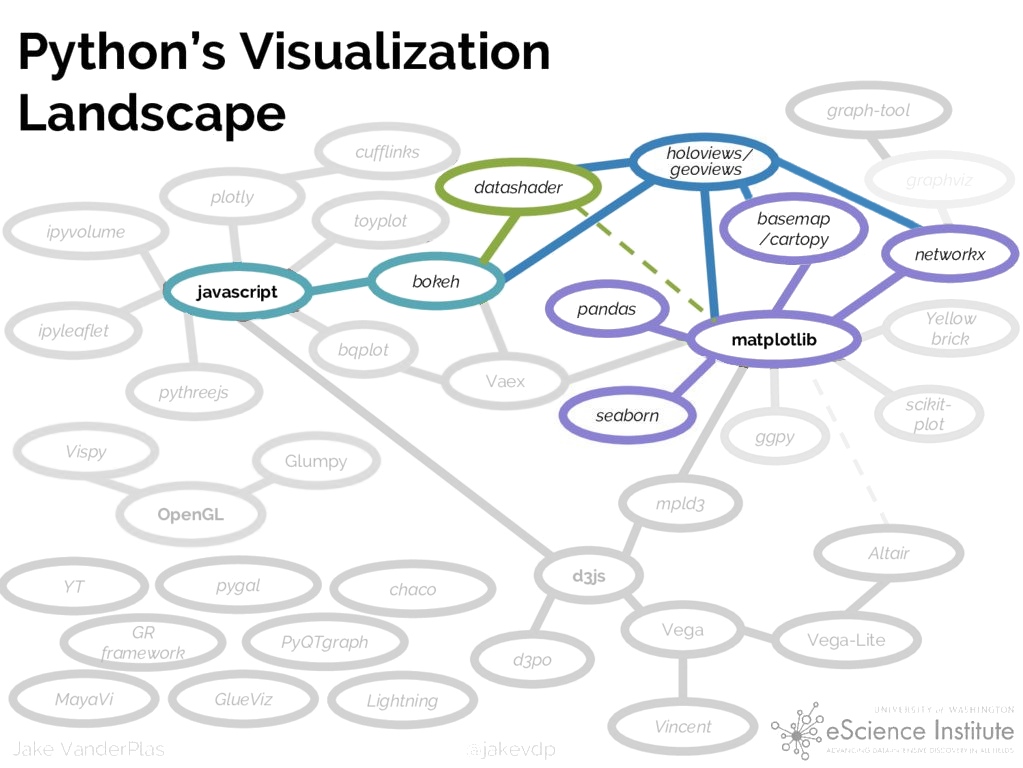

## A set of coordinated visualization libraries in Python

<center>
    <a href=https://holoviz.org/>
        <img src=attachment:Screen%20Shot%202019-09-19%20at%2012.43.29%20AM.png width=200></img>
    </a>
</center>
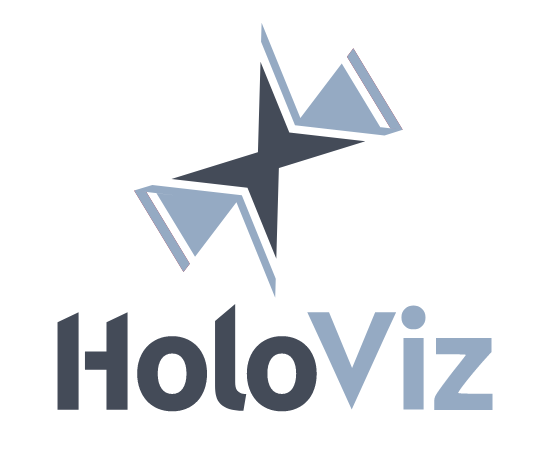

## The motivation behind HoloViz mirrors the goals of this course

Proper data visualization is crucial throughout all of the steps of the data science pipeline: data wrangling, modeling, and storytelling

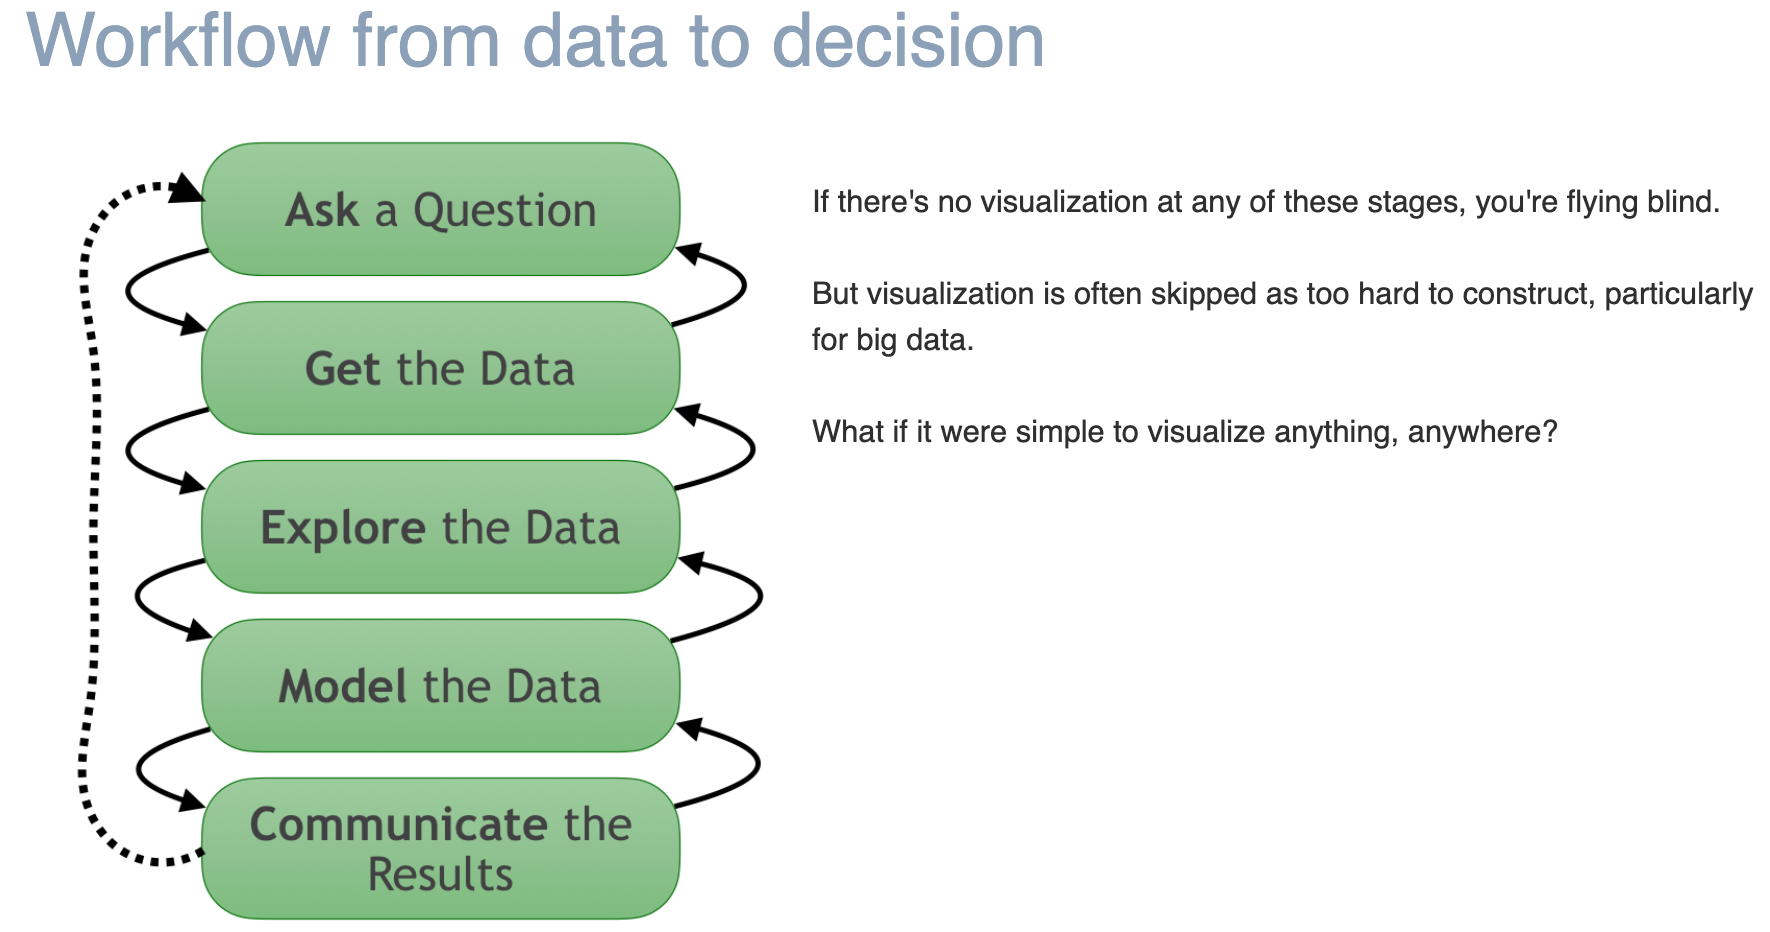</img>

<center>
    <img src=attachment:Screen%20Shot%202019-09-19%20at%2012.46.03%20AM%201.png width=700></img>
</center>
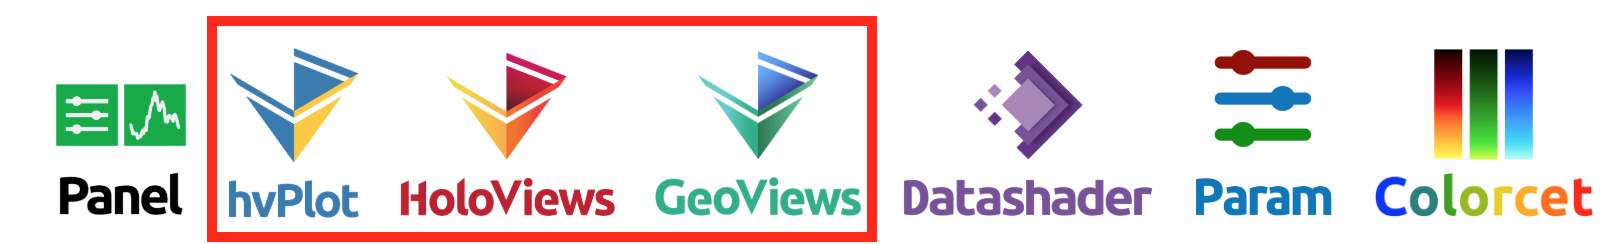

### Today: `hvPlot`, `Holoviews`, `Geoviews`

### Later in the course: `Datashader`, `Param`, `Panel`

## A quick overview

- **Bokeh**: creating interactive visualizations using Javascript using Python
- **HoloViews**: a declarative, high-level library for creating bokeh libraries

### $\rightarrow$ Similar to altair and Vega

## A significant pro: 

GeoViews builds on HoloViews to add support for geographic data

## The major con: 

- All are relatively new
- Bokeh is the most well-tested
- HoloViews, GeoViews, hvPlot are being actively developed but are very promising

## How does `hvPlot` fit in?

## The `hvPlot` package

It's **relatively new**: officially released in February 2019

In [1]:
%%html 

<center>
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">We are very pleased officially announce the release of hvPlot! It provides a high-level plotting API for the PyData ecosystem including <a href="https://twitter.com/pandas_dev?ref_src=twsrc%5Etfw">@pandas_dev</a>, <a href="https://twitter.com/xarray_dev?ref_src=twsrc%5Etfw">@xarray_dev</a>, <a href="https://twitter.com/dask_dev?ref_src=twsrc%5Etfw">@dask_dev</a>, <a href="https://twitter.com/geopandas?ref_src=twsrc%5Etfw">@geopandas</a> and more, generating interactive <a href="https://twitter.com/datashader?ref_src=twsrc%5Etfw">@datashader</a> and <a href="https://twitter.com/BokehPlots?ref_src=twsrc%5Etfw">@BokehPlots</a>. <a href="https://t.co/Loc5XElJUL">https://t.co/Loc5XElJUL</a></p>&mdash; HoloViews (@HoloViews) <a href="https://twitter.com/HoloViews/status/1092409050283819010?ref_src=twsrc%5Etfw">February 4, 2019</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
</center>


## Main use

- Quickly generate interactive plots from your data
- Seamlessly handles pandas and geopandas data
- Relies on Holoviews and Geoviews under the hood

An interface just like the `pandas` plot() function, but **much** more useful.

## Let's load some data to try out

In [2]:
# Our usual imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# let's load the measles data from week 2
url = "https://raw.githubusercontent.com/MUSA-550-Fall-2021/week-2/master/data/measles_incidence.csv"
measles_data_raw = pd.read_csv(url, skiprows=2, na_values='-')

In [4]:
measles_data_raw.head()

,YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,1,3.67,NaN,1.90,4.11,1.38,8.38,4.50,8.58,...,5.69,22.03,1.18,0.4,0.28,NaN,14.83,3.36,1.54,0.91
1,1928,2,6.25,NaN,6.40,9.91,1.80,6.02,9.00,7.30,...,6.57,16.96,0.63,NaN,0.56,NaN,17.34,4.19,0.96,NaN
2,1928,3,7.95,NaN,4.50,11.15,1.31,2.86,8.81,15.88,...,2.04,24.66,0.62,0.2,1.12,NaN,15.67,4.19,4.79,1.36
3,1928,4,12.58,NaN,1.90,13.75,1.87,13.71,10.40,4.29,...,2.19,18.86,0.37,0.2,6.70,NaN,12.77,4.66,1.64,3.64
4,1928,5,8.03,NaN,0.47,20.79,2.38,5.13,16.80,5.58,...,3.94,20.05,1.57,0.4,6.70,NaN,18.83,7.37,2.91,0.91


## Convert from wide to long formats...

In [5]:
measles_data = measles_data_raw.melt(id_vars=["YEAR", "WEEK"], value_name="incidence", var_name="state")

In [6]:
measles_data.head()

,YEAR,WEEK,state,incidence
0,1928,1,ALABAMA,3.67
1,1928,2,ALABAMA,6.25
2,1928,3,ALABAMA,7.95
3,1928,4,ALABAMA,12.58
4,1928,5,ALABAMA,8.03


## Reminder: plotting with `pandas` 

The default `.plot()` doesn't know which variables to plot.

<AxesSubplot:>

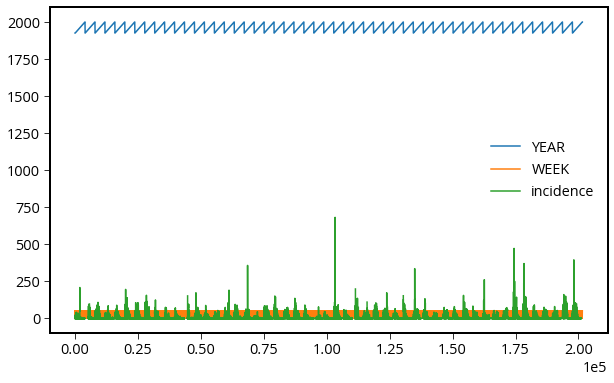

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
measles_data.plot(ax=ax)

But we can group by the year, and plot the national average each year

In [8]:
by_year = measles_data.groupby("YEAR")['incidence'].sum()
by_year.head()

YEAR
1928    16924.34
1929    12060.96
1930    14575.11
1931    15427.67
1932    14481.11
Name: incidence, dtype: float64

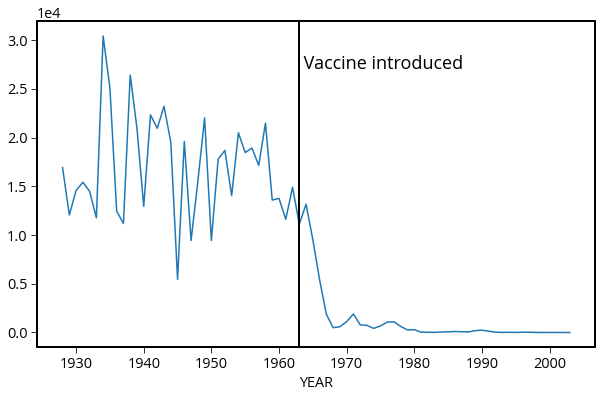

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the annual average by year
by_year.plot(ax=ax)

# Add the vaccine year and label
ax.axvline(x=1963, c='k', linewidth=2)
ax.text(1963, 27000, " Vaccine introduced", ha='left', fontsize=18);

## Adding interactivity with `hvplot`

Use the `.hvplot()` to create interactive plots.

In [16]:
# This will add the .hvplot() function to your DataFrame!
import hvplot.pandas

# Import holoviews too
import holoviews as hv

In [11]:
img = by_year.hvplot(kind='line')
img

:Curve   [YEAR]   (incidence)

In this case, `.hvplot()` creates a `Holoviews` `Curve` object.

Not unlike `altair` `Chart` objects, it's an object that knows how to translate from your DataFrame data to a visualization.

In [12]:
print(img)

:Curve   [YEAR]   (incidence)


## Many different chart types are available...

In [13]:
by_year.hvplot(kind='scatter')

:Scatter   [YEAR]   (incidence)

In [14]:
by_year.hvplot(kind='bar', rot=90, width=1000)

:Bars   [YEAR]   (incidence)

## Just like in altair, we can also layer chart elements together

Use the `*` operator to layer together chart elements.

**Note:** the same thing can be accomplished in altair, but with the `+` operator. 

In [17]:
# The line chart of incidence vs year
incidence = by_year.hvplot(kind='line')

# Vertical line + label for vaccine year
vline = hv.VLine(1963).opts(color='black')
label = hv.Text(1963, 27000, " Vaccine introduced", halign='left')

final_chart = incidence * vline * label
final_chart

:Overlay
   .Curve.Incidence :Curve   [YEAR]   (incidence)
   .VLine.I         :VLine   [x,y]
   .Text.I          :Text   [x,y]

## We can group charts by a specific column, with automatic widget selectors

This is some powerful magic.

Let's calculate the annual measles incidence for each year and state:

In [18]:
by_state = measles_data.groupby(['YEAR', 'state'])['incidence'].sum()
by_state.head()

YEAR  state     
1928  ALABAMA       334.99
      ALASKA          0.00
      ARIZONA       200.75
      ARKANSAS      481.77
      CALIFORNIA     69.22
Name: incidence, dtype: float64

Now, tell `hvplot` to plot produce charts for each state:

In [19]:
by_state_chart = by_state.hvplot(x="YEAR",
                                 y="incidence",
                                 groupby="state", 
                                 width=400, 
                                 kind="line")

by_state_chart

:DynamicMap   [state]
   :Curve   [YEAR]   (incidence)

## We can select out individual charts from the set of grouped objects

In [20]:
PA = by_state_chart['PENNSYLVANIA'].relabel('PA')
NJ = by_state_chart['NEW JERSEY'].relabel('NJ')  

## Combine charts as subplots with the `+` operator

In [21]:
combined = PA + NJ     

combined

:Layout
   .Curve.PA :Curve   [YEAR]   (incidence)
   .Curve.NJ :Curve   [YEAR]   (incidence)

In [22]:
print(combined)

:Layout
   .Curve.PA :Curve   [YEAR]   (incidence)
   .Curve.NJ :Curve   [YEAR]   (incidence)


The charts are side-by-side by default. You can also specify the number of rows/columns explicitly.

In [23]:
# one column
combined.cols(1)

:Layout
   .Curve.PA :Curve   [YEAR]   (incidence)
   .Curve.NJ :Curve   [YEAR]   (incidence)

## We can also show overlay lines on the sample plot

Using the `by` keyword:

In [24]:
states = ['NEW YORK', 'NEW JERSEY', 'CALIFORNIA', 'PENNSYLVANIA']
sub_states = by_state.loc[:, states]

In [25]:
sub_state_chart = sub_states.hvplot(x='YEAR', 
                                    y='incidence', 
                                    by='state', 
                                    kind='line') 

sub_state_chart * vline

:Overlay
   .NdOverlay.Incidence :NdOverlay   [state]
      :Curve   [YEAR]   (incidence)
   .VLine.I             :VLine   [x,y]

## We can also show faceted plots

Just like in altair, when we used the `alt.Chart().facet(column='state')` syntax 

Below, we specify the `state` column should be mapped to each column:

In [26]:
img = sub_states.hvplot(x="YEAR", 
                        y='incidence',
                        col="state", 
                        kind="line", 
                        rot=90, 
                        frame_width=200) * vline
img

:GridSpace   [state]
   :Overlay
      .Curve.Incidence :Curve   [YEAR]   (incidence)
      .VLine.I         :VLine   [x,y]

## Functions for each kind of chart type are available too

In [25]:
# by_state.hvplot.

## For example, we could plot a bar chart for these four states

In [27]:
by_state.loc[1960:1970, states].hvplot.bar(x='YEAR', 
                                           y='incidence', 
                                           by='state', rot=90)

:Bars   [YEAR,state]   (incidence)

Change `bar()` to `line()` and we get the same thing as before.

In [28]:
by_state.loc[1960:1970, states].hvplot.line(x='YEAR', 
                                            y='incidence', 
                                            by='state', rot=90)

:NdOverlay   [state]
   :Curve   [YEAR]   (incidence)

## Customizing charts

See the help message for explicit hvplot functions:

In [28]:
by_state.hvplot?

In [29]:
by_state.hvplot.line?

## Heatmaps are available too...

Can we reproduce the [WSJ measles heatmap](http://graphics.wsj.com/infectious-diseases-and-vaccines/) that we made in altair in week 2? 

Use the help function:

In [30]:
measles_data.hvplot.heatmap?

## Two methods:

We want to plot 'YEAR' on the x axis, 'state' on the y axis, and specify 'incidence' as the values begin plotted in each heatmap bin.

1. Use the original, tidy data (`measles_data`) with columns for state, week, year, and incidence
    - you will need to use the `reduce_function` keyword to sum over weeks
1. You can use the `by_state` data frame which has already summed over weeks for each state

In [29]:
# METHOD #1: just plot the incidence
heatmap = by_state.hvplot.heatmap(
    x="YEAR",
    y="state", 
    C="incidence",
    cmap="viridis",
    height=500,
    width=1000,
    flip_yaxis=True,
    rot=90,
)
heatmap.redim(
    state="State", YEAR="Year",
)

:HeatMap   [Year,State]   (incidence)

In [30]:
## METHOD 2: hvplot does the aggregation
heatmap = measles_data.hvplot.heatmap(
    x="YEAR",
    y="state",
    C="incidence",
    cmap='viridis',
    reduce_function=np.sum,
    height=500,
    width=1000,
    flip_yaxis=True,
    rot=90,
)
heatmap.redim(state="State", YEAR="Year")

:HeatMap   [Year,State]   (incidence)

## Just like altair: save the file as html

In [31]:
import hvplot
hvplot.save(heatmap, 'measles.html')

In [32]:
# load the html file and display it
from IPython.display import HTML
HTML('measles.html')

## One last thing: scatter matrix plots

Visualizing relationships between variables, as we have seen in [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) and [altair](https://altair-viz.github.io/gallery/scatter_matrix.html)

Let's load the penguins data set from week 2

In [33]:
url = "https://raw.githubusercontent.com/MUSA-550-Fall-2021/week-2/master/data/penguins.csv"
penguins = pd.read_csv(url)

In [34]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Use the `hvplot.scatter_matrix()` function:

In [35]:
penguins.hvplot.scatter?

In [39]:
columns = ['flipper_length_mm', 
           'bill_length_mm', 
           'body_mass_g', 
           'species']
hvplot.scatter_matrix(penguins[columns], c='species')

:GridMatrix   [X,Y]
   :NdOverlay   [species]
      :Histogram   [flipper_length_mm]   (flipper_length_mm_count)

Note the "box select" and "lasso" features on the tool bar for interactions

## Recap: altair vs hvplot

- Both use a declarative syntax (altair more so than hvplot)
- Users of ggplot might be more familiar with altair's syntax
- hvplot integrates directly into pandas dataframes via the `.hvplot()` function

- Both have support for cross-filtering and interactions
- Both can be incorporated into web-based dashboard via HTML (later in course)
- hvplot has better support for large data (later in course)

#### It's largely up to you which one you feel is easier to use

## hvplot can also be used with geopandas!

Let's load some geographic data for countries:

In [40]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [41]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Plotting with just geopandas

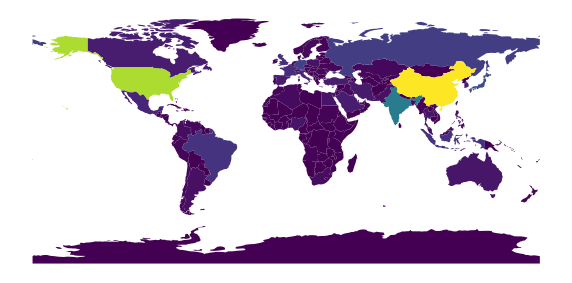

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
world.plot(column='gdp_md_est', ax=ax)
ax.set_axis_off()

## Now with hvplot

In [43]:
world.hvplot.polygons?

In [44]:
# Can also just do world.hvplot()
world.hvplot.polygons(c='gdp_md_est', 
                      geo=True, 
                      frame_height=400)

:Polygons   [Longitude,Latitude]   (gdp_md_est)

## Let's try it on our median assessment values per neighborhood from last week

In [45]:
import geopandas as gpd

In [46]:
# Load the data
url = "https://raw.githubusercontent.com/MUSA-550-Fall-2021/week-3/master/data/opa_residential.csv"
data = pd.read_csv(url)

# Create the Point() objects
data['Coordinates'] = gpd.points_from_xy(data['lng'], data['lat'])

# Create the GeoDataFrame
data = gpd.GeoDataFrame(data, geometry='Coordinates', crs="EPSG:4326")

In [47]:
# load the Zillow data from GitHub
url = "https://raw.githubusercontent.com/MUSA-550-Fall-2020/week-3/master/data/zillow_neighborhoods.geojson"
zillow = gpd.read_file(url)

In [48]:
# Important: Make sure the CRS match
data = data.to_crs(zillow.crs)

# perform the spatial join
data = gpd.sjoin(data, zillow, op='within', how='left')

In [49]:
# Calculate the median market value per Zillow neighborhood
median_values = data.groupby('ZillowName', as_index=False)['market_value'].median()

# Merge median values with the Zillow geometries
median_values = zillow.merge(median_values, on='ZillowName')
print(type(median_values))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [50]:
median_values.head()

,ZillowName,geometry,market_value
0,Academy Gardens,"POLYGON ((-74.99851 40.06435, -74.99456 40.061...",185950.0
1,Allegheny West,"POLYGON ((-75.16592 40.00327, -75.16596 40.003...",34750.0
2,Andorra,"POLYGON ((-75.22463 40.06686, -75.22588 40.065...",251900.0
3,Aston Woodbridge,"POLYGON ((-75.00860 40.05369, -75.00861 40.053...",183800.0
4,Bartram Village,"POLYGON ((-75.20733 39.93350, -75.20733 39.933...",48300.0


In [51]:
median_values.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
# pass arguments directly to hvplot() 
# and it recognizes polygons automatically
median_values.hvplot(c='market_value', 
                     frame_width=600, 
                     frame_height=500, 
                     geo=True, 
                     cmap='viridis', 
                     hover_cols=['ZillowName'])

:Polygons   [Longitude,Latitude]   (market_value,ZillowName)

## Important: `geo=True` assumes EPSG:4326

If you specify `geo=True`, the data needs to be in typical lat/lng CRS. If not, you can use the `crs` keyword to specify the type of CRS your data is in.

In [53]:
median_values_3857 = median_values.to_crs(epsg=3857)

In [54]:
median_values_3857.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [55]:
median_values_3857.hvplot(c='market_value', 
                     frame_width=600, 
                     frame_height=500, 
                     geo=True, 
                     crs=3857, # NEW: specify the CRS
                     cmap='viridis', 
                     hover_cols=['ZillowName'])

:Polygons   [Longitude,Latitude]   (market_value,ZillowName)

## Now we can take advantage of GeoViews

Let's add a tile source underneath the choropleth map

In [56]:
import geoviews as gv
import geoviews.tile_sources as gvts

In [57]:
%%opts WMTS [width=800, height=800, xaxis=None, yaxis=None]

choro = median_values.hvplot(c='market_value', 
                             width=500, 
                             height=400, 
                             alpha=0.5, 
                             geo=True, 
                             cmap='viridis', 
                             hover_cols=['ZillowName'])
gvts.ESRI * choro

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (market_value,ZillowName)

## Many of the most common tile sources are available..

In [58]:
print(type(gvts.ESRI))

<class 'geoviews.element.geo.WMTS'>


In [59]:
%%opts WMTS [width=200, height=200, xaxis=None, yaxis=None]

(gvts.OSM + gvts.Wikipedia + gvts.StamenToner + gvts.EsriNatGeo +
 gvts.EsriImagery + gvts.EsriUSATopo + gvts.EsriTerrain + gvts.CartoDark).cols(4)

:Layout
   .WMTS.I    :WMTS   [Longitude,Latitude]
   .WMTS.II   :WMTS   [Longitude,Latitude]
   .WMTS.III  :WMTS   [Longitude,Latitude]
   .WMTS.IV   :WMTS   [Longitude,Latitude]
   .WMTS.V    :WMTS   [Longitude,Latitude]
   .WMTS.VI   :WMTS   [Longitude,Latitude]
   .WMTS.VII  :WMTS   [Longitude,Latitude]
   .WMTS.VIII :WMTS   [Longitude,Latitude]

**Note**: we've used the `%%opts` cell magic to apply syling options to any charts generated in the cell.

See [the documentation guide on customizations](http://holoviews.org/user_guide/Notebook_Magics.html) for more details.

## What about interactive hex bins?

You can do it with hvplot! **Sort of**.

### Step 1: Extract out the x/y values of the data 

- Let's add them as new columns into the data frame
- Remember, you can the use "x" and "y" attributes of the "geometry" column.

In [60]:
data['x'] = data.geometry.x
data['y'] = data.geometry.y

In [61]:
data.head()

,parcel_number,lat,lng,location,market_value,building_value,land_value,total_land_area,total_livable_area,Coordinates,index_right,ZillowName,x,y
0,71361800,39.991575,-75.128994,2726 A ST,62200.0,44473.0,17727.0,1109.69,1638.0,POINT (-75.12899 39.99158),79.0,McGuire,-75.128994,39.991575
1,71362100,39.991702,-75.128978,2732 A ST,25200.0,18018.0,7182.0,1109.69,1638.0,POINT (-75.12898 39.99170),79.0,McGuire,-75.128978,39.991702
2,71362200,39.991744,-75.128971,2734 A ST,62200.0,44473.0,17727.0,1109.69,1638.0,POINT (-75.12897 39.99174),79.0,McGuire,-75.128971,39.991744
3,71362600,39.991994,-75.128895,2742 A ST,15500.0,11083.0,4417.0,1109.69,1638.0,POINT (-75.12889 39.99199),79.0,McGuire,-75.128895,39.991994
4,71363800,39.992592,-75.128743,2814 A ST,31300.0,22400.0,8900.0,643.50,890.0,POINT (-75.12874 39.99259),79.0,McGuire,-75.128743,39.992592


### Step 2: Create a new DataFrame with only the columns we need

- In this case, we'll use the `x` and `y` coordinate columns and the associated `market_value` column
- **Important:** hvplot's hexbin won't work if the input data is a GeoDataFrame, e.g., still has a `geometry` column
   - By doing the column selection, we convert the data into a regular pandas DataFrame

In [62]:
subdata = data[['x', 'y', 'market_value']]

In [63]:
type(subdata)

pandas.core.frame.DataFrame

### Step 3: Plot with the hexbin function

- Similar syntax to matplotlib's hexbin() function
- Specify:
    - The x/y coordinates, 
    - An optional `C` column to aggregate for each bin (raw counts are shown if not provided)
    - A `reduce_function` that determines how to aggregate the `C` column

In [64]:
data.hvplot.hexbin?

In [65]:
subdata.head()

,x,y,market_value
0,-75.128994,39.991575,62200.0
1,-75.128978,39.991702,25200.0
2,-75.128971,39.991744,62200.0
3,-75.128895,39.991994,15500.0
4,-75.128743,39.992592,31300.0


In [66]:
subdata.hvplot.hexbin(x='x', 
                      y='y', 
                      C='market_value', 
                      reduce_function=np.median, 
                      logz=True, 
                      geo=True, 
                      gridsize=40, 
                      cmap='viridis')

:HexTiles   [x,y]   (market_value)

Not the prettiest but it gets the job done for some quick exploratory analysis!

## Documentation references

- [Hvplot user guide](https://hvplot.pyviz.org/user_guide/index.html)
- [HoloViz tutorial](https://holoviz.org/talks/index.html): introduction to the HoloViz ecosystem
- [HoloViews user guide](http://holoviews.org/user_guide/index.html) and [gallery](http://holoviews.org/gallery/index.html)
- [GeoViews user guide](http://geoviews.org/user_guide/index.html) and [gallery](http://geoviews.org/gallery/index.html)

Some **very cool** examples available in the galleries

## That's it!

- Homework #2 due on Wednesday
- Office hours tomorrow evening, 6-8pm (sign up on Canvas)
- Wednesday we'll dive into raster data analysis